In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import text
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from time import time
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from io import StringIO
import sklearn.model_selection as model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import PassiveAggressiveClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('root2ai - Data.csv')

In [3]:
data.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [4]:
data.describe()

,Text,Target
count,22701,22704
unique,20986,11
top,billion,FinTech
freq,41,8551


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22704 entries, 0 to 22703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    22701 non-null  object
 1   Target  22704 non-null  object
dtypes: object(2)
memory usage: 354.9+ KB


In [6]:
data.isnull().sum()

Text      3
Target    0
dtype: int64

In [7]:
data.shape

(22704, 2)

In [8]:
print(data.isnull().value_counts())

Text   Target
False  False     22701
True   False         3
dtype: int64


In [9]:
data.Target.unique()

array(['Blockchain', 'Bigdata', 'credit reporting', 'Cyber Security',
       'FinTech', 'Microservices', 'Neobanks', 'Robo Advising',
       'Stock Trading', 'Data Security', 'Reg Tech'], dtype=object)

In [10]:
data.Target.value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        977
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

In [11]:
data.Text.isnull().value_counts()

False    22701
True         3
Name: Text, dtype: int64

In [12]:
data = data.dropna()

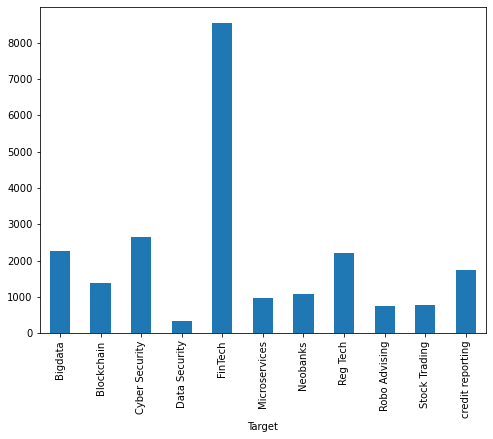

In [13]:
fig = plt.figure(figsize=(8,6))
data.groupby('Target').Text.count().plot.bar(ylim=0)
plt.show()

In [14]:
df=data.copy()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Target']= label_encoder.fit_transform(df['Target'])
df

,Text,Target
0,reserve bank forming expert committee based in...,1
1,director could play role financial system,1
2,preliminary discuss secure transaction study r...,1
3,security indeed prove essential transforming f...,1
4,bank settlement normally take three days based...,1
...,...,...
22699,fourth study discusses blockchain technology e...,7
22700,book finishes stating biggest issue emerging F...,7
22701,people culture cess,7
22702,author challenges execu tive lead change stop ...,7


In [15]:
cv = text.TfidfVectorizer(sublinear_tf=True, min_df=10, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = cv.fit_transform(data.Text)
pd.DataFrame(features.toarray(),columns=cv.get_feature_names())


,ability,able,able offer,absolutely,abstract,abundance,academic,accelerate,accelerated,accelerator,...,write,written,wrong,year,years,yield,york,young,younger,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22697,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
labels = data.Target
features.shape

(22701, 3267)

# Modeling

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Target'],test_size = 0.25, random_state = 0)
count_vect = text.CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = text.TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)


X_test_tfidf = count_vect.transform(X_test)


In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17025,) (17025,)
(5676,) (5676,)


# MultinomialNB

In [19]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)


y_pred_class = clf.predict(X_test_tfidf)

In [20]:
#calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

Accuracy:  0.576814658210007
              precision    recall  f1-score   support

           0       0.94      0.54      0.69       562
           1       0.88      0.16      0.26       361
           2       0.72      0.38      0.49       673
           3       0.00      0.00      0.00        97
           4       0.49      0.98      0.65      2129
           5       0.97      0.14      0.25       229
           6       0.88      0.03      0.05       248
           7       0.89      0.66      0.75       548
           8       1.00      0.02      0.03       177
           9       0.94      0.20      0.33       218
          10       0.81      0.30      0.44       434

    accuracy                           0.58      5676
   macro avg       0.77      0.31      0.36      5676
weighted avg       0.71      0.58      0.52      5676



In [21]:
print(clf.predict(tfidf_transformer.fit_transform(count_vect.transform(["this type architecture inserts data parallel dbms implements mapreduce hadoop frameworks"]))))

[0]


In [22]:
data.loc[data["Text"] == "this type architecture inserts data parallel dbms implements mapreduce hadoop frameworks"]

,Text,Target
2000,this type architecture inserts data parallel d...,Bigdata


# LogisticRegression

In [23]:
logreg = LogisticRegression(class_weight="balanced") #instantiate a logistic regression model
logreg.fit(X_train_tfidf, y_train) #fit the model with training data

#Make predictions on test data
y_pred_class = logreg.predict(X_test_tfidf)

#calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

Accuracy:  0.5028188865398168
              precision    recall  f1-score   support

           0       0.75      0.62      0.68       562
           1       0.46      0.61      0.52       361
           2       0.52      0.46      0.49       673
           3       0.10      0.52      0.16        97
           4       0.80      0.31      0.45      2129
           5       0.35      0.70      0.47       229
           6       0.28      0.59      0.38       248
           7       0.85      0.67      0.75       548
           8       0.32      0.69      0.43       177
           9       0.45      0.67      0.54       218
          10       0.48      0.72      0.58       434

    accuracy                           0.50      5676
   macro avg       0.49      0.60      0.50      5676
weighted avg       0.64      0.50      0.52      5676



# LinearSVC

In [24]:
svm = LinearSVC(class_weight='balanced') #instantiate a support vector machine model
svm.fit(X_train_tfidf, y_train) #fit the model with training data

#Make predictions on test data
y_pred_class = svm.predict(X_test_tfidf)

#calculate evaluation measures:
print("Accuracy: ", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

Accuracy:  0.571000704721635
              precision    recall  f1-score   support

           0       0.84      0.69      0.76       562
           1       0.52      0.60      0.56       361
           2       0.56      0.48      0.52       673
           3       0.10      0.45      0.16        97
           4       0.79      0.46      0.58      2129
           5       0.40      0.72      0.52       229
           6       0.36      0.50      0.42       248
           7       0.91      0.76      0.83       548
           8       0.37      0.69      0.48       177
           9       0.46      0.64      0.53       218
          10       0.47      0.73      0.57       434

    accuracy                           0.57      5676
   macro avg       0.52      0.61      0.54      5676
weighted avg       0.66      0.57      0.59      5676



# PassiveAggressiveClassifier

In [25]:
classifier = PassiveAggressiveClassifier(max_iter=1)
classifier.fit(X_train_tfidf,y_train)

PassiveAggressiveClassifier(max_iter=1)

In [26]:
y_pred = classifier.predict(X_test_tfidf)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 61.7%


# Model Selection on the bases of accuracy score mean

In [27]:
models = [
    #XGBClassifier(eval_metric='mlogloss'),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0, max_iter = 300),
    PassiveAggressiveClassifier(max_iter=10),
]

In [28]:
CV=30
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

In [29]:
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [30]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.376486
1,RandomForestClassifier,1,0.376486
2,RandomForestClassifier,2,0.379128
3,RandomForestClassifier,3,0.376486
4,RandomForestClassifier,4,0.379128
...,...,...,...
145,PassiveAggressiveClassifier,25,0.579365
146,PassiveAggressiveClassifier,26,0.629630
147,PassiveAggressiveClassifier,27,0.617725
148,PassiveAggressiveClassifier,28,0.585979


In [33]:
cv_df.groupby('model_name').accuracy.mean()*100

model_name
LinearSVC                      61.698678
LogisticRegression             60.958229
MultinomialNB                  58.521780
PassiveAggressiveClassifier    57.302222
RandomForestClassifier         37.747263
Name: accuracy, dtype: float64

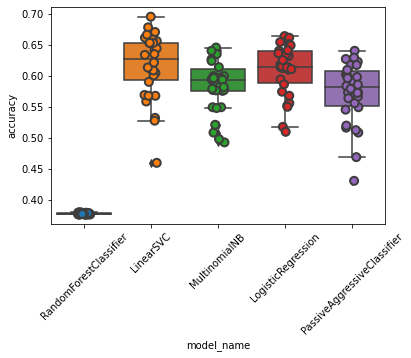

In [32]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.xticks(rotation=45)
plt.show()